# PEPPAN plots

PEPPAN computes the pan-genome of a set of genomes. It needs a folder with the prokka GFFs, producing a  "combined GFF", `ST131.PEPPAN.gff` in the example, which in the next step can be used by `PEPPAN_parser` to produce the rarefication tables used to make the plots below:

```sh
PEPPAN -t 14 -p examples/ST131 -P examples/GCF_000010485.combined.gff.gz examples/*.gff.gz
PEPPAN_parser -g examples/ST131.PEPPAN.gff -s examples/PEPPAN_out -t -c -a 95
```

PEPPAN is not meant to actually obtain the sequences of the genes of the pan-genome (for example uses incomplete genes), It is meant to predict these genes and compute the rarification curves. It was used because It showed better performance than the competition (**Also, it's relatively fast**):

<https://genome.cshlp.org/content/30/11/1667.full>


Documentation:
https://github.com/zheminzhou/PEPPAN/tree/master/docs/source/usage



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

In [3]:
%matplotlib inline

## `PEPPAN_parser` output

`PEPPAN_parser` produces 3 tables, one for the *pan-genome*, one for the *core-genome*, and one which have the previous two tables plus more information like the alphas and the number of pan and core genes. In this case, these 3 tables are:

- `blau_all.PEPPAN.gene_content_pan-curve.tsv`
- `blau_all.PEPPAN.gene_content_core-curve.tsv`
-  `blau_all.PEPPAN.gene_content.curve` : The previous two table plus more info


### Reading the tables

In [4]:
root = Path("/path_to/files")
fname = "blau_all.PEPPAN.gene_content_pan-curve.tsv"
pan_df  = pd.read_csv(root.joinpath(fname), sep='\t', header=0, names=['Median', '2.5%', '97.5%'])
pan_df.head(3)

,Median,2.5%,97.5%
0,3450,2922,5317
1,5176,3988,7479
2,6534,5092,9028


In [7]:
core_fname = "blau_all.PEPPAN.gene_content_core-curve.tsv"
core_df = pd.read_csv(root.joinpath(core_fname), sep='\t', header=0, names=['Median', '2.5%', '97.5%'])
core_df.head(3)

,Median,2.5%,97.5%
0,3450,2922,5317
1,1805,1305,2808
2,1352,1085,2257


In [5]:
colors = sns.color_palette('colorblind', 2).as_hex()
colors

['#0173b2', '#de8f05']

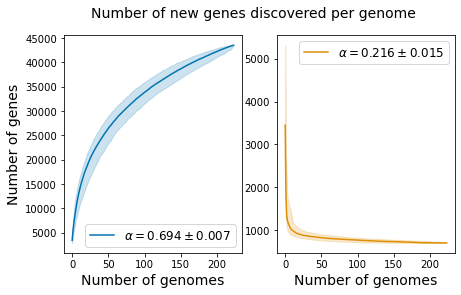

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(7,4))
fig.suptitle("Number of new genes discovered per genome", size=14)
c = 0
# alphas from `blau_all.PEPPAN.gene_content.curve`
alphas = [(0.694, 0.007), (0.216, 0.015)]
for ax, df in zip(axs.flat, [pan_df, core_df]):
    alpha= alphas[c]
    line = ax.plot(df['Median'], colors[c])
    ax.fill_between(x=df.index, y1=df['2.5%'], y2=df['97.5%'], alpha=0.2, color=colors[c])
    ax.legend(line,[rf'$\alpha = {alpha[0]} \pm {alpha[1]}$'], 
               framealpha=0.8, prop={'size':12}, ncol=2)
    ax.set_xlabel("Number of genomes", size=14)
    if c == 0:
        ax.set_ylabel('Number of genes', size=14)
    c += 1
# plt.savefig('alphas.svg')
# plt.savefig('alphas.png')
